In [1]:
%cd /home/nozawa/MD

/home/nozawa/MD


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from ase.io import Trajectory
import os
from tqdm import tqdm
import japanize_matplotlib

output_folder_path = "."

traj_file_path = os.path.join(output_folder_path, "NS2_T3000_1.traj")
traj = Trajectory(traj_file_path)

In [14]:
energies = np.loadtxt(os.path.join(output_folder_path, "energies.txt"), delimiter=",")
time = energies[:, 0]
time.shape

(75,)

100%|██████████| 75/75 [00:00<00:00, 3359.21it/s]


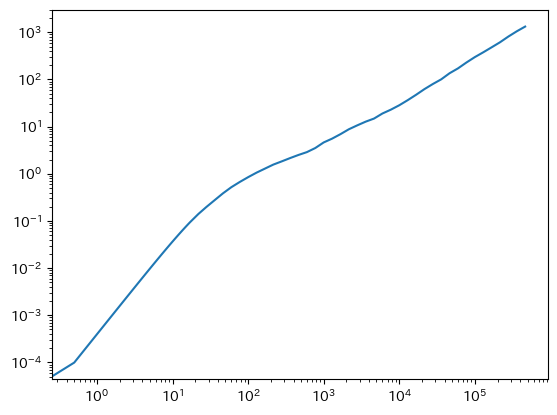

In [15]:
#すべての原子についてmsdを計算
atoms_0 = traj[0]
pos_0 = atoms_0.get_positions()

msd_list = []

for atoms in tqdm(traj):
    pos_t = atoms.get_positions()
    squared_disp = np.sum((pos_t - pos_0) ** 2, axis=1)
    msd_list.append(np.mean(squared_disp))

msd = np.array(msd_list)

plt.plot(time, msd)
plt.xscale("log")
plt.yscale("log")

plt.savefig("NS2_T3000.png")

100%|██████████| 75/75 [00:00<00:00, 3478.79it/s]
/tmp/ipykernel_29046/108305146.py:14: RuntimeWarning: invalid value encountered in divide
  msd = np.array(msd_list) / (6 * time)


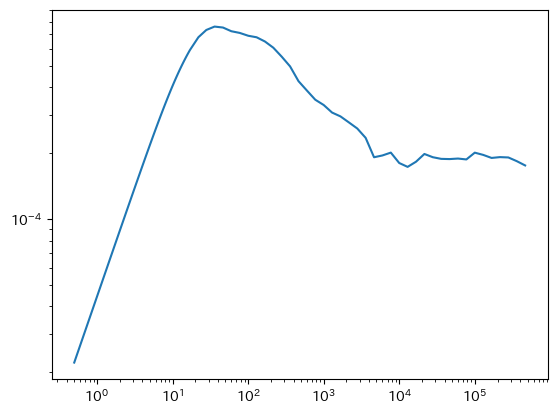

In [16]:
#特定の原子のみについてmsdを計算
target_symbol = "Si"
atoms_0 = traj[0]
indices = [atom.index for atom in atoms_0 if atom.symbol == target_symbol]
pos_0 = atoms_0.get_positions()[indices]

msd_list = []

for atoms in tqdm(traj):
    pos_t = atoms.get_positions()[indices]
    squared_disp = np.sum((pos_t - pos_0) ** 2, axis=1)
    msd_list.append(np.mean(squared_disp))

msd = np.array(msd_list) / (6 * time)

plt.plot(time, msd)
plt.xscale("log")
plt.yscale("log")

plt.savefig("output_T5.png")

100%|██████████| 75/75 [00:00<00:00, 3651.20it/s]


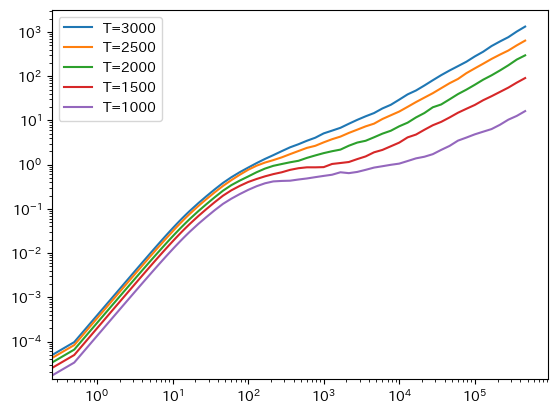

In [7]:
traj_file_path_3000 = os.path.join(output_folder_path, "NS2_T3000.traj")
traj_file_path_2500 = os.path.join(output_folder_path, "NS2_T2500.traj")
traj_file_path_2000 = os.path.join(output_folder_path, "NS2_T2000.traj")
traj_file_path_1500 = os.path.join(output_folder_path, "NS2_T1500.traj")
traj_file_path_1000 = os.path.join(output_folder_path, "NS2_T1000.traj")

traj_3000 = Trajectory(traj_file_path_3000)
traj_2500 = Trajectory(traj_file_path_2500)
traj_2000 = Trajectory(traj_file_path_2000)
traj_1500 = Trajectory(traj_file_path_1500)
traj_1000 = Trajectory(traj_file_path_1000)

energies = np.loadtxt(os.path.join(output_folder_path, "energies.txt"), delimiter=",")
time = energies[:, 0]
time.shape

atoms_0_3000 = traj_3000[0]
atoms_0_2500 = traj_2500[0]
atoms_0_2000 = traj_2000[0]
atoms_0_1500 = traj_1500[0]
atoms_0_1000 = traj_1000[0]

pos_0_3000 = atoms_0_3000.get_positions()
pos_0_2500 = atoms_0_2500.get_positions()
pos_0_2000 = atoms_0_2000.get_positions()
pos_0_1500 = atoms_0_1500.get_positions()
pos_0_1000 = atoms_0_1000.get_positions()

msd_list_3000 = []
msd_list_2500 = []
msd_list_2000 = []
msd_list_1500 = []
msd_list_1000 = []

for atoms in tqdm(traj_3000):
    pos_t = atoms.get_positions()
    squared_disp = np.sum((pos_t - pos_0_3000) ** 2, axis=1)
    msd_list_3000.append(np.mean(squared_disp))

for atoms in tqdm(traj_2500):
    pos_t = atoms.get_positions()
    squared_disp = np.sum((pos_t - pos_0_2500) ** 2, axis=1)
    msd_list_2500.append(np.mean(squared_disp))

for atoms in tqdm(traj_2000):
    pos_t = atoms.get_positions()
    squared_disp = np.sum((pos_t - pos_0_2000) ** 2, axis=1)
    msd_list_2000.append(np.mean(squared_disp))

for atoms in tqdm(traj_1500):
    pos_t = atoms.get_positions()
    squared_disp = np.sum((pos_t - pos_0_1500) ** 2, axis=1)
    msd_list_1500.append(np.mean(squared_disp))

for atoms in tqdm(traj_1000):
    pos_t = atoms.get_positions()
    squared_disp = np.sum((pos_t - pos_0_1000) ** 2, axis=1)
    msd_list_1000.append(np.mean(squared_disp))

msd_3000 = np.array(msd_list_3000)
msd_2500 = np.array(msd_list_2500)
msd_2000 = np.array(msd_list_2000)
msd_1500 = np.array(msd_list_1500)
msd_1000 = np.array(msd_list_1000)

plt.plot(time, msd_3000, label="T=3000")
plt.plot(time, msd_2500, label="T=2500")
plt.plot(time, msd_2000, label="T=2000")
plt.plot(time, msd_1500, label="T=1500")
plt.plot(time, msd_1000, label="T=1000")

plt.xscale("log")
plt.yscale("log")

plt.legend()

plt.savefig("NS2_MSD_comparison.png")

In [42]:
target_symbol = "Si"

traj_file_path_3000 = os.path.join(output_folder_path, "NS2_T3000.traj")
traj_file_path_2500 = os.path.join(output_folder_path, "NS2_T2500.traj")
traj_file_path_2000 = os.path.join(output_folder_path, "NS2_T2000.traj")
traj_file_path_1500 = os.path.join(output_folder_path, "NS2_T1500.traj")
traj_file_path_1000 = os.path.join(output_folder_path, "NS2_T1000.traj")

traj_3000 = Trajectory(traj_file_path_3000)
traj_2500 = Trajectory(traj_file_path_2500)
traj_2000 = Trajectory(traj_file_path_2000)
traj_1500 = Trajectory(traj_file_path_1500)
traj_1000 = Trajectory(traj_file_path_1000)

energies = np.loadtxt(os.path.join(output_folder_path, "energies.txt"), delimiter=",")
time = energies[:, 0]

atoms_0_3000 = traj_3000[0]
atoms_0_2500 = traj_2500[0]
atoms_0_2000 = traj_2000[0]
atoms_0_1500 = traj_1500[0]
atoms_0_1000 = traj_1000[0]

indices_3000 = [atom.index for atom in atoms_0_3000 if atom.symbol == target_symbol]
indices_2500 = [atom.index for atom in atoms_0_3000 if atom.symbol == target_symbol]
indices_2000 = [atom.index for atom in atoms_0_3000 if atom.symbol == target_symbol]
indices_1500 = [atom.index for atom in atoms_0_3000 if atom.symbol == target_symbol]
indices_1000 = [atom.index for atom in atoms_0_3000 if atom.symbol == target_symbol]

pos_0_3000 = atoms_0_3000.get_positions()[indices_3000]
pos_0_2500 = atoms_0_2500.get_positions()[indices_2500]
pos_0_2000 = atoms_0_2000.get_positions()[indices_2000]
pos_0_1500 = atoms_0_1500.get_positions()[indices_1500]
pos_0_1000 = atoms_0_1000.get_positions()[indices_1000]

msd_list_3000_Si = []
msd_list_2500_Si = []
msd_list_2000_Si = []
msd_list_1500_Si = []
msd_list_1000_Si = []

for atoms in tqdm(traj_3000):
    pos_t = atoms.get_positions()[indices_3000]
    squared_disp = np.sum((pos_t - pos_0_3000) ** 2, axis=1)
    msd_list_3000_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_2500):
    pos_t = atoms.get_positions()[indices_2500]
    squared_disp = np.sum((pos_t - pos_0_2500) ** 2, axis=1)
    msd_list_2500_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_2000):
    pos_t = atoms.get_positions()[indices_2000]
    squared_disp = np.sum((pos_t - pos_0_2000) ** 2, axis=1)
    msd_list_2000_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_1500):
    pos_t = atoms.get_positions()[indices_1500]
    squared_disp = np.sum((pos_t - pos_0_1500) ** 2, axis=1)
    msd_list_1500_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_1000):
    pos_t = atoms.get_positions()[indices_1000]
    squared_disp = np.sum((pos_t - pos_0_1000) ** 2, axis=1)
    msd_list_1000_Si.append(np.mean(squared_disp))

msd_3000_Si = np.array(msd_list_3000_Si)
msd_2500_Si = np.array(msd_list_2500_Si)
msd_2000_Si = np.array(msd_list_2000_Si)
msd_1500_Si = np.array(msd_list_1500_Si)
msd_1000_Si = np.array(msd_list_1000_Si)

plt.plot(time, msd_3000_Si, label="T=3000")
plt.plot(time, msd_2500_Si, label="T=2500")
plt.plot(time, msd_2000_Si, label="T=2000")
plt.plot(time, msd_1500_Si, label="T=1500")
plt.plot(time, msd_1000_Si, label="T=1000")

plt.xscale("log")
plt.yscale("log")

plt.legend()
plt.title("NS2の、SiのMSDの比較")

plt.savefig("NS2_MSD_comparison.png")

FileNotFoundError: [Errno 2] No such file or directory: 'NS2_T2000.traj'

  0%|          | 0/75 [00:00<?, ?it/s]

100%|██████████| 75/75 [00:00<00:00, 3052.18it/s]
/tmp/ipykernel_904/3636402201.py:89: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


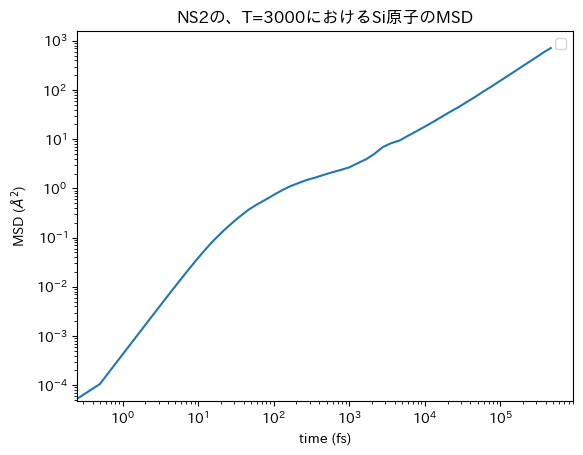

In [50]:
target_symbol = "O"

traj_file_path_3000_0 = os.path.join(output_folder_path, "NS2_T3000_0.traj")
traj_file_path_3000_1 = os.path.join(output_folder_path, "NS2_T3000_1.traj")
traj_file_path_3000_2 = os.path.join(output_folder_path, "NS2_T3000_2.traj")
traj_file_path_3000_3 = os.path.join(output_folder_path, "NS2_T3000_3.traj")
traj_file_path_3000_4 = os.path.join(output_folder_path, "NS2_T3000_4.traj")

energies = np.loadtxt(os.path.join(output_folder_path, "energies.txt"), delimiter=",")
time = energies[:, 0]

traj_3000_0 = Trajectory(traj_file_path_3000_0)
traj_3000_1 = Trajectory(traj_file_path_3000_1)
traj_3000_2 = Trajectory(traj_file_path_3000_2)
traj_3000_3 = Trajectory(traj_file_path_3000_3)
traj_3000_4 = Trajectory(traj_file_path_3000_4)

atoms_0_3000_0 = traj_3000_0[0]
atoms_0_3000_1 = traj_3000_1[0]
atoms_0_3000_2 = traj_3000_2[0]
atoms_0_3000_3 = traj_3000_3[0]
atoms_0_3000_4 = traj_3000_4[0]

indices_3000_0 = [atom.index for atom in atoms_0_3000_0 if atom.symbol == target_symbol]
indices_3000_1 = [atom.index for atom in atoms_0_3000_1 if atom.symbol == target_symbol]
indices_3000_2 = [atom.index for atom in atoms_0_3000_2 if atom.symbol == target_symbol]
indices_3000_3 = [atom.index for atom in atoms_0_3000_3 if atom.symbol == target_symbol]
indices_3000_4 = [atom.index for atom in atoms_0_3000_4 if atom.symbol == target_symbol]

pos_0_3000_0 = atoms_0_3000_0.get_positions()[indices_3000_0]
pos_0_3000_1 = atoms_0_3000_1.get_positions()[indices_3000_1]
pos_0_3000_2 = atoms_0_3000_2.get_positions()[indices_3000_2]
pos_0_3000_3 = atoms_0_3000_3.get_positions()[indices_3000_3]
pos_0_3000_4 = atoms_0_3000_4.get_positions()[indices_3000_4]

msd_list_3000_0_Si = []
msd_list_3000_1_Si = []
msd_list_3000_2_Si = []
msd_list_3000_3_Si = []
msd_list_3000_4_Si = []

for atoms in tqdm(traj_3000_0):
    pos_t = atoms.get_positions()[indices_3000_0]
    squared_disp = np.sum((pos_t - pos_0_3000_0) ** 2, axis=1)
    msd_list_3000_0_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_3000_1):
    pos_t = atoms.get_positions()[indices_3000_1]
    squared_disp = np.sum((pos_t - pos_0_3000_1) ** 2, axis=1)
    msd_list_3000_1_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_3000_2):
    pos_t = atoms.get_positions()[indices_3000_2]
    squared_disp = np.sum((pos_t - pos_0_3000_2) ** 2, axis=1)
    msd_list_3000_2_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_3000_3):
    pos_t = atoms.get_positions()[indices_3000_3]
    squared_disp = np.sum((pos_t - pos_0_3000_3) ** 2, axis=1)
    msd_list_3000_3_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_3000_4):
    pos_t = atoms.get_positions()[indices_3000_4]
    squared_disp = np.sum((pos_t - pos_0_3000_4) ** 2, axis=1)
    msd_list_3000_4_Si.append(np.mean(squared_disp))

msd_3000_0_Si = np.array(msd_list_3000_0_Si)
msd_3000_1_Si = np.array(msd_list_3000_1_Si)
msd_3000_2_Si = np.array(msd_list_3000_2_Si)
msd_3000_3_Si = np.array(msd_list_3000_3_Si)
msd_3000_4_Si = np.array(msd_list_3000_4_Si)

msd_3000_Si = np.mean([msd_3000_0_Si, 
                       msd_3000_1_Si, 
                       msd_3000_2_Si, 
                       msd_3000_3_Si, 
                       msd_3000_4_Si], axis=0)

plt.plot(time, msd_3000_Si)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("time (fs)")
plt.ylabel("MSD ($Å^2$)")

plt.title("NS2の、T=3000におけるSi原子のMSD")

plt.legend()

  0%|          | 0/84 [00:00<?, ?it/s]

100%|██████████| 84/84 [00:00<00:00, 3097.03it/s]
/tmp/ipykernel_904/1448203615.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


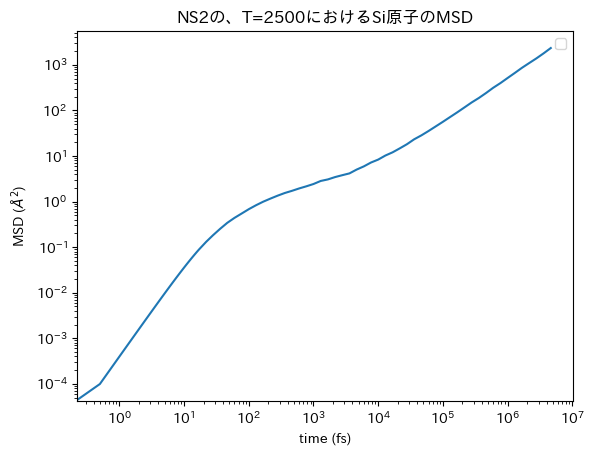

In [51]:
traj_file_path_2500_0 = os.path.join(output_folder_path, "NS2_T2500_0.traj")
traj_file_path_2500_1 = os.path.join(output_folder_path, "NS2_T2500_1.traj")
traj_file_path_2500_2 = os.path.join(output_folder_path, "NS2_T2500_2.traj")
traj_file_path_2500_3 = os.path.join(output_folder_path, "NS2_T2500_3.traj")
traj_file_path_2500_4 = os.path.join(output_folder_path, "NS2_T2500_4.traj")

energies_2500 = np.loadtxt(os.path.join(output_folder_path, "NS2_energies_T2500.txt"), delimiter=",")
time_2500 = energies_2500[:, 0]

traj_2500_0 = Trajectory(traj_file_path_2500_0)
traj_2500_1 = Trajectory(traj_file_path_2500_1)
traj_2500_2 = Trajectory(traj_file_path_2500_2)
traj_2500_3 = Trajectory(traj_file_path_2500_3)
traj_2500_4 = Trajectory(traj_file_path_2500_4)

atoms_0_2500_0 = traj_2500_0[0]
atoms_0_2500_1 = traj_2500_1[0]
atoms_0_2500_2 = traj_2500_2[0]
atoms_0_2500_3 = traj_2500_3[0]
atoms_0_2500_4 = traj_2500_4[0]

indices_2500_0 = [atom.index for atom in atoms_0_2500_0 if atom.symbol == target_symbol]
indices_2500_1 = [atom.index for atom in atoms_0_2500_1 if atom.symbol == target_symbol]
indices_2500_2 = [atom.index for atom in atoms_0_2500_2 if atom.symbol == target_symbol]
indices_2500_3 = [atom.index for atom in atoms_0_2500_3 if atom.symbol == target_symbol]
indices_2500_4 = [atom.index for atom in atoms_0_2500_4 if atom.symbol == target_symbol]

pos_0_2500_0 = atoms_0_2500_0.get_positions()[indices_2500_0]
pos_0_2500_1 = atoms_0_2500_1.get_positions()[indices_2500_1]
pos_0_2500_2 = atoms_0_2500_2.get_positions()[indices_2500_2]
pos_0_2500_3 = atoms_0_2500_3.get_positions()[indices_2500_3]
pos_0_2500_4 = atoms_0_2500_4.get_positions()[indices_2500_4]

msd_list_2500_0_Si = []
msd_list_2500_1_Si = []
msd_list_2500_2_Si = []
msd_list_2500_3_Si = []
msd_list_2500_4_Si = []

for atoms in tqdm(traj_2500_0):
    pos_t = atoms.get_positions()[indices_2500_0]
    squared_disp = np.sum((pos_t - pos_0_2500_0) ** 2, axis=1)
    msd_list_2500_0_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_2500_1):
    pos_t = atoms.get_positions()[indices_2500_1]
    squared_disp = np.sum((pos_t - pos_0_2500_1) ** 2, axis=1)
    msd_list_2500_1_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_2500_2):
    pos_t = atoms.get_positions()[indices_2500_2]
    squared_disp = np.sum((pos_t - pos_0_2500_2) ** 2, axis=1)
    msd_list_2500_2_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_2500_3):
    pos_t = atoms.get_positions()[indices_2500_3]
    squared_disp = np.sum((pos_t - pos_0_2500_3) ** 2, axis=1)
    msd_list_2500_3_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_2500_4):
    pos_t = atoms.get_positions()[indices_2500_4]
    squared_disp = np.sum((pos_t - pos_0_2500_4) ** 2, axis=1)
    msd_list_2500_4_Si.append(np.mean(squared_disp))

msd_2500_0_Si = np.array(msd_list_2500_0_Si)
msd_2500_1_Si = np.array(msd_list_2500_1_Si)
msd_2500_2_Si = np.array(msd_list_2500_2_Si)
msd_2500_3_Si = np.array(msd_list_2500_3_Si)
msd_2500_4_Si = np.array(msd_list_2500_4_Si)

msd_2500_Si = np.mean([msd_2500_0_Si, 
                       msd_2500_1_Si, 
                       msd_2500_2_Si, 
                       msd_2500_3_Si, 
                       msd_2500_4_Si], axis=0)

plt.plot(time_2500, msd_2500_Si)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("time (fs)")
plt.ylabel("MSD ($Å^2$)")

plt.title("NS2の、T=2500におけるSi原子のMSD")

plt.legend()

  0%|          | 0/84 [00:00<?, ?it/s]

100%|██████████| 84/84 [00:00<00:00, 3257.05it/s]
/tmp/ipykernel_904/2493184154.py:87: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


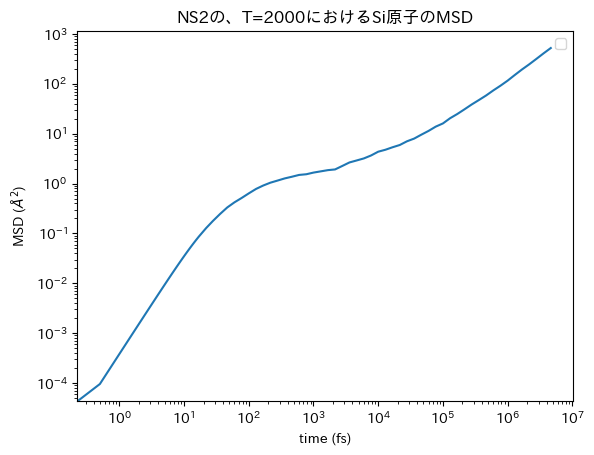

In [52]:
traj_file_path_2000_0 = os.path.join(output_folder_path, "NS2_T2000_0.traj")
traj_file_path_2000_1 = os.path.join(output_folder_path, "NS2_T2000_1.traj")
traj_file_path_2000_2 = os.path.join(output_folder_path, "NS2_T2000_2.traj")
traj_file_path_2000_3 = os.path.join(output_folder_path, "NS2_T2000_3.traj")
traj_file_path_2000_4 = os.path.join(output_folder_path, "NS2_T2000_4.traj")

energies_2000 = np.loadtxt(os.path.join(output_folder_path, "NS2_energies_T2000.txt"), delimiter=",")
time_2000 = energies_2000[:, 0]

traj_2000_0 = Trajectory(traj_file_path_2000_0)
traj_2000_1 = Trajectory(traj_file_path_2000_1)
traj_2000_2 = Trajectory(traj_file_path_2000_2)
traj_2000_3 = Trajectory(traj_file_path_2000_3)
traj_2000_4 = Trajectory(traj_file_path_2000_4)

atoms_0_2000_0 = traj_2000_0[0]
atoms_0_2000_1 = traj_2000_1[0]
atoms_0_2000_2 = traj_2000_2[0]
atoms_0_2000_3 = traj_2000_3[0]
atoms_0_2000_4 = traj_2000_4[0]

indices_2000_0 = [atom.index for atom in atoms_0_2000_0 if atom.symbol == target_symbol]
indices_2000_1 = [atom.index for atom in atoms_0_2000_1 if atom.symbol == target_symbol]
indices_2000_2 = [atom.index for atom in atoms_0_2000_2 if atom.symbol == target_symbol]
indices_2000_3 = [atom.index for atom in atoms_0_2000_3 if atom.symbol == target_symbol]
indices_2000_4 = [atom.index for atom in atoms_0_2000_4 if atom.symbol == target_symbol]

pos_0_2000_0 = atoms_0_2000_0.get_positions()[indices_2000_0]
pos_0_2000_1 = atoms_0_2000_1.get_positions()[indices_2000_1]
pos_0_2000_2 = atoms_0_2000_2.get_positions()[indices_2000_2]
pos_0_2000_3 = atoms_0_2000_3.get_positions()[indices_2000_3]
pos_0_2000_4 = atoms_0_2000_4.get_positions()[indices_2000_4]

msd_list_2000_0_Si = []
msd_list_2000_1_Si = []
msd_list_2000_2_Si = []
msd_list_2000_3_Si = []
msd_list_2000_4_Si = []

for atoms in tqdm(traj_2000_0):
    pos_t = atoms.get_positions()[indices_2000_0]
    squared_disp = np.sum((pos_t - pos_0_2000_0) ** 2, axis=1)
    msd_list_2000_0_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_2000_1):
    pos_t = atoms.get_positions()[indices_2000_1]
    squared_disp = np.sum((pos_t - pos_0_2000_1) ** 2, axis=1)
    msd_list_2000_1_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_2000_2):
    pos_t = atoms.get_positions()[indices_2000_2]
    squared_disp = np.sum((pos_t - pos_0_2000_2) ** 2, axis=1)
    msd_list_2000_2_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_2000_3):
    pos_t = atoms.get_positions()[indices_2000_3]
    squared_disp = np.sum((pos_t - pos_0_2000_3) ** 2, axis=1)
    msd_list_2000_3_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_2000_4):
    pos_t = atoms.get_positions()[indices_2000_4]
    squared_disp = np.sum((pos_t - pos_0_2000_4) ** 2, axis=1)
    msd_list_2000_4_Si.append(np.mean(squared_disp))

msd_2000_0_Si = np.array(msd_list_2000_0_Si)
msd_2000_1_Si = np.array(msd_list_2000_1_Si)
msd_2000_2_Si = np.array(msd_list_2000_2_Si)
msd_2000_3_Si = np.array(msd_list_2000_3_Si)
msd_2000_4_Si = np.array(msd_list_2000_4_Si)

msd_2000_Si = np.mean([msd_2000_0_Si, 
                       msd_2000_1_Si, 
                       msd_2000_2_Si, 
                       msd_2000_3_Si, 
                       msd_2000_4_Si], axis=0)

plt.plot(time_2000, msd_2000_Si)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("time (fs)")
plt.ylabel("MSD ($Å^2$)")

plt.title("NS2の、T=2000におけるSi原子のMSD")

plt.legend()

/tmp/ipykernel_904/2683744942.py:1: RuntimeWarning: invalid value encountered in divide
  msd_6t_3000_Si =  msd_3000_Si / (6 * time)
/tmp/ipykernel_904/2683744942.py:2: RuntimeWarning: invalid value encountered in divide
  msd_6t_2500_Si =  msd_2500_Si / (6 * time_2500)
/tmp/ipykernel_904/2683744942.py:3: RuntimeWarning: invalid value encountered in divide
  msd_6t_2000_Si =  msd_2000_Si / (6 * time_2000)


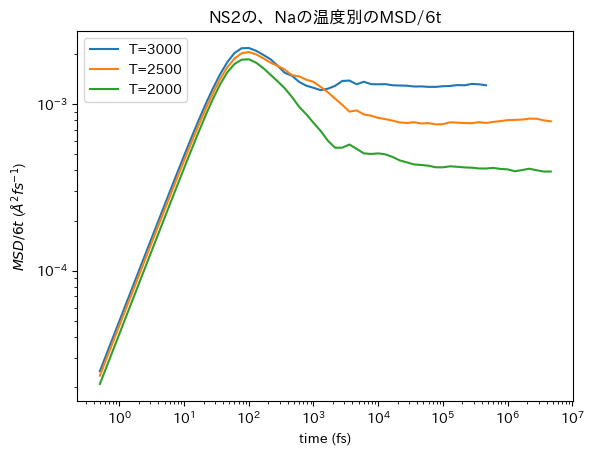

In [29]:
msd_6t_3000_Si =  msd_3000_Si / (6 * time)
msd_6t_2500_Si =  msd_2500_Si / (6 * time_2500)
msd_6t_2000_Si =  msd_2000_Si / (6 * time_2000)

plt.plot(time, msd_6t_3000_Si, label="T=3000")
plt.plot(time_2500, msd_6t_2500_Si, label="T=2500")
plt.plot(time_2000, msd_6t_2000_Si, label="T=2000")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("time (fs)")
plt.ylabel("$MSD / 6t$ ($Å^2 fs^{-1}$)")

plt.title("NS2の、Naの温度別のMSD/6t")

plt.legend()
plt.savefig("MSD_6t_NS2_Na.png")

  0%|          | 0/75 [00:00<?, ?it/s]

100%|██████████| 75/75 [00:00<00:00, 3276.97it/s]


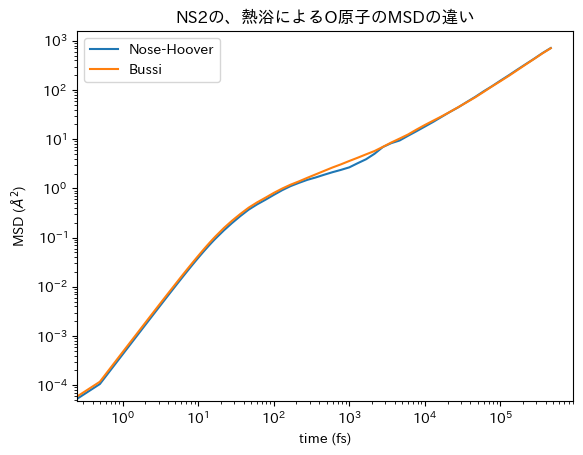

In [53]:
target_symbol = "O"
output_folder_path = "/home/nozawa/MD/result/NS2_T3000/"

traj_file_path_3000_0 = os.path.join(output_folder_path, "NS2_T3000_0.traj")
traj_file_path_3000_1 = os.path.join(output_folder_path, "NS2_T3000_1.traj")
traj_file_path_3000_2 = os.path.join(output_folder_path, "NS2_T3000_2.traj")
traj_file_path_3000_3 = os.path.join(output_folder_path, "NS2_T3000_3.traj")
traj_file_path_3000_4 = os.path.join(output_folder_path, "NS2_T3000_4.traj")

traj_3000_0 = Trajectory(traj_file_path_3000_0)
traj_3000_1 = Trajectory(traj_file_path_3000_1)
traj_3000_2 = Trajectory(traj_file_path_3000_2)
traj_3000_3 = Trajectory(traj_file_path_3000_3)
traj_3000_4 = Trajectory(traj_file_path_3000_4)

atoms_0_3000_0 = traj_3000_0[0]
atoms_0_3000_1 = traj_3000_1[0]
atoms_0_3000_2 = traj_3000_2[0]
atoms_0_3000_3 = traj_3000_3[0]
atoms_0_3000_4 = traj_3000_4[0]

indices_3000_0 = [atom.index for atom in atoms_0_3000_0 if atom.symbol == target_symbol]
indices_3000_1 = [atom.index for atom in atoms_0_3000_1 if atom.symbol == target_symbol]
indices_3000_2 = [atom.index for atom in atoms_0_3000_2 if atom.symbol == target_symbol]
indices_3000_3 = [atom.index for atom in atoms_0_3000_3 if atom.symbol == target_symbol]
indices_3000_4 = [atom.index for atom in atoms_0_3000_4 if atom.symbol == target_symbol]

pos_0_3000_0 = atoms_0_3000_0.get_positions()[indices_3000_0]
pos_0_3000_1 = atoms_0_3000_1.get_positions()[indices_3000_1]
pos_0_3000_2 = atoms_0_3000_2.get_positions()[indices_3000_2]
pos_0_3000_3 = atoms_0_3000_3.get_positions()[indices_3000_3]
pos_0_3000_4 = atoms_0_3000_4.get_positions()[indices_3000_4]

msd_list_3000_0_Si = []
msd_list_3000_1_Si = []
msd_list_3000_2_Si = []
msd_list_3000_3_Si = []
msd_list_3000_4_Si = []

for atoms in tqdm(traj_3000_0):
    pos_t = atoms.get_positions()[indices_3000_0]
    squared_disp = np.sum((pos_t - pos_0_3000_0) ** 2, axis=1)
    msd_list_3000_0_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_3000_1):
    pos_t = atoms.get_positions()[indices_3000_1]
    squared_disp = np.sum((pos_t - pos_0_3000_1) ** 2, axis=1)
    msd_list_3000_1_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_3000_2):
    pos_t = atoms.get_positions()[indices_3000_2]
    squared_disp = np.sum((pos_t - pos_0_3000_2) ** 2, axis=1)
    msd_list_3000_2_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_3000_3):
    pos_t = atoms.get_positions()[indices_3000_3]
    squared_disp = np.sum((pos_t - pos_0_3000_3) ** 2, axis=1)
    msd_list_3000_3_Si.append(np.mean(squared_disp))

for atoms in tqdm(traj_3000_4):
    pos_t = atoms.get_positions()[indices_3000_4]
    squared_disp = np.sum((pos_t - pos_0_3000_4) ** 2, axis=1)
    msd_list_3000_4_Si.append(np.mean(squared_disp))

msd_3000_0_Si = np.array(msd_list_3000_0_Si)
msd_3000_1_Si = np.array(msd_list_3000_1_Si)
msd_3000_2_Si = np.array(msd_list_3000_2_Si)
msd_3000_3_Si = np.array(msd_list_3000_3_Si)
msd_3000_4_Si = np.array(msd_list_3000_4_Si)

msd_3000_Si_Bussi = np.mean([msd_3000_0_Si, 
                       msd_3000_1_Si, 
                       msd_3000_2_Si, 
                       msd_3000_3_Si, 
                       msd_3000_4_Si], axis=0)

plt.plot(time, msd_3000_Si, label="Nose-Hoover")
plt.plot(time, msd_3000_Si_Bussi, label="Bussi")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("time (fs)")
plt.ylabel("MSD ($Å^2$)")

plt.legend()

plt.title("NS2の、熱浴によるO原子のMSDの違い")
plt.savefig("NS2_T3000_MSD_Bussi_Nose-Hoover_O.png")

/tmp/ipykernel_904/78867200.py:1: RuntimeWarning: invalid value encountered in divide
  plt.plot(time, msd_3000_Si / (6 * time), label="Nose-Hoover")
/tmp/ipykernel_904/78867200.py:2: RuntimeWarning: invalid value encountered in divide
  plt.plot(time, msd_3000_Si_Bussi / (6 * time), label="Bussi")


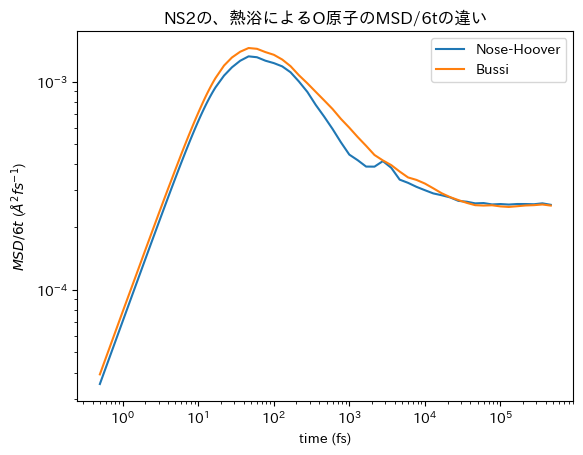

In [54]:
plt.plot(time, msd_3000_Si / (6 * time), label="Nose-Hoover")
plt.plot(time, msd_3000_Si_Bussi / (6 * time), label="Bussi")

plt.xscale("log")
plt.yscale("log")

plt.xlabel("time (fs)")
plt.ylabel("$MSD / 6t$ ($Å^2 fs^{-1}$)")

plt.legend()

plt.title("NS2の、熱浴によるO原子のMSD/6tの違い")
plt.savefig("NS2_T3000_MSD_over_6t_Bussi_Nose-Hoover_O.png")